<a href="https://colab.research.google.com/github/KJM94/pyd/blob/main/step03_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## torch GPU 설정

In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda:0")

## MNIST 데이터 셋

In [ ]:
from torchvision import datasets

PATH_DATA = "./data"
train_data = datasets.MNIST(PATH_DATA, train = True, download=True)

- extract the input data and target labels

In [ ]:
X_train, y_train = train_data.data, train_data.targets
print(X_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


- Load the MNIST test dataset

In [ ]:
val_data = datasets.MNIST(PATH_DATA, train = False, download=True)
X_val, y_val = val_data.data, val_data.targets
print(X_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


- Add a new dimension to the tensors


In [ ]:
if len(X_train.shape) == 3:
  X_train = X_train.unsqueeze(1)
print(X_train.shape)

if len(X_val.shape) == 3:
  X_val = X_val.unsqueeze(1)
print(X_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


## Visualization

In [ ]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
def show(img):
  # convert tensor to numpy array
  np_img = img.numpy()

  # Convert to H * W * C shape
  np_img_tr = np.transpose(np_img, (1, 2, 0))

  plt.imshow(np_img_tr, interpolation='nearest')

torch.Size([3, 152, 122])


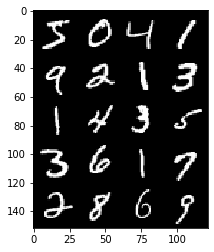

In [ ]:
X_grid = utils.make_grid(X_train[:20], nrow=4, padding=2)
print(X_grid.shape)

show(X_grid)

## Data Transformation
- Image Transformation is an effective technique that's used to improve a models' performance

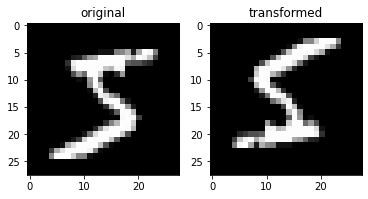

In [ ]:
from torchvision import transforms
from torchvision import datasets

PATH_DATA = "./data"
train_data = datasets.MNIST(PATH_DATA, train = True, download=True)

# define transformations
data_transform = transforms.Compose([
  transforms.RandomHorizontalFlip(p=1), 
  transforms.RandomVerticalFlip(p=1), 
  transforms.ToTensor(), 
])

# image dataset
img = train_data[0][0]

# transform sample image
img_tr = data_transform(img)

# convert tensor to numpy array
img_tr_np = img_tr.numpy()

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("original")
ax[1].imshow(img_tr_np[0], cmap="gray")
ax[1].set_title("transformed")

plt.show()

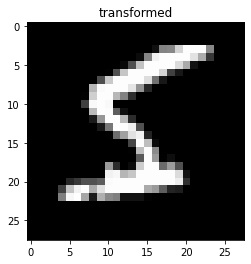

In [ ]:
data_transform = transforms.Compose([
  transforms.RandomHorizontalFlip(p=1), 
  transforms.RandomVerticalFlip(p=1), 
  transforms.ToTensor(), 
])

train_data = datasets.MNIST(PATH_DATA, train = True, download=True, transform=data_transform)

# image dataset
img = train_data[0][0]
fig, ax = plt.subplots()
ax.imshow(img[0], cmap="gray")
ax.set_title("transformed")
plt.show()

## Wrapping tensors into a dataset

In [ ]:
from torchvision import datasets
from torch.utils.data import TensorDataset

PATH_DATA = "./data"

train_data = datasets.MNIST(PATH_DATA, train = True, download=True)
X_train, y_train = train_data.data, train_data.targets

val_data = datasets.MNIST(PATH_DATA, train = False, download=True)
X_val, y_val = val_data.data, val_data.targets

train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

for x, y in train_ds:
  print(x.shape, y.item())
  break

torch.Size([28, 28]) 5


## Creating Data Loaders

In [ ]:
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size = 8)

for xb, yb in train_dl:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([8, 28, 28])
torch.Size([8])


## Building Models
- define linear layer, two-layer network, and a multilayer convolutional network. 

In [ ]:
from torch import nn

# input tensor 64 * 1000
input_tensor = torch.randn(64, 1000)
linear_layer = nn.Linear(1000, 100)
output = linear_layer(input_tensor)
print(output.size())

torch.Size([64, 100])


### Defining models using nn.Sequential
- four nodes as input
- five nodes in the hidden layer
- one node as the output
- `nn.Sequential` package is to create a deep learning model by passing layers in order

<img src='http://drive.google.com/uc?export=view&id=1K-lS9ewySzNL3A8vzOoYiqzTAHmYOGCG' /><br>



In [ ]:
from torch import nn 
model = nn.Sequential(
    nn.Linear(4, 5), 
    nn.Linear(5, 10),
    nn.ReLU(), 
    nn.Linear(10, 1), 
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=10, bias=True)
  (2): ReLU()
  (3): Linear(in_features=10, out_features=1, bias=True)
)


### Defining models using nn.Module
- __init__ method 사용. 
- in the forward method, we apply the layers to inputs. 
<img src='http://drive.google.com/uc?export=view&id=1kjADsfGCT5-ENrjNGliNjBE8poZHuWkt' /><br>

In [ ]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5, 1)
        self.conv2 = nn.Conv2d(8, 16, 5, 1)
        self.fc1 = nn.Linear(4*4*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


### Moving the model to CUDA device 

In [ ]:
print(next(model.parameters()).device)

cpu


- Move the model to the CUDA device

In [ ]:
device = torch.device("cuda:0")
model.to(device)

print(next(model.parameters()).device)

cuda:0


- pytorch summary

In [ ]:
from torchsummary import summary
summary(model, input_size = (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
            Linear-4                   [-1, 10]           1,010
Total params: 30,134
Trainable params: 30,134
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


### Defining the loss function 

In [ ]:
from torchvision import datasets
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

PATH_DATA = "./data"

train_data = datasets.MNIST(PATH_DATA, train = True, download=True)
X_train, y_train = train_data.data, train_data.targets

val_data = datasets.MNIST(PATH_DATA, train = False, download=True)
X_val, y_val = val_data.data, val_data.targets

# First, add a dimension to tensor to become B*C*H*W
if len(X_train.shape)==3:
    X_train=X_train.unsqueeze(1)
print(X_train.shape)

if len(X_val.shape)==3:
    X_val=X_val.unsqueeze(1)

train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

loss_func = nn.NLLLoss(reduction="sum")

# iterate over batches
for xb,yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    xb = xb.type(torch.float).to(device)
    yb = yb.to(device)

    out = model(xb)
    # calculate loss value
    loss = loss_func(out, yb)
    print(loss.item())
    break
    # your training code will be here!


torch.Size([60000, 1, 28, 28])
torch.Size([8, 1, 28, 28])
torch.Size([8])
115.74520874023438


In [ ]:
# compute gradients
loss.backward() # Backpropagation Algorithm. 

### Defining the Optimizer


In [ ]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)

# update model parameters
opt.step()

#  Don't forget to set the gradients to zero before computing the gradients of the next batch
opt.zero_grad()

### Training and Evaluation
- helper function to compute the loss value per mini-batch

In [ ]:
def loss_batch(loss_func, xb, yb, yb_h, opt = None):
  # obtain loss 
  loss = loss_func(yb_h, yb)

  # obtain performance metric
  metric_b = metrics_batch(yb, yb_h)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item(), metric_b

def metrics_batch(target, output):

  # obtain output class
  pred = output.argmax(dim=1, keepdim=True)

  # Compare output class with target class 
  corrects = pred.eq(target.view_as(pred)).sum().item()
  return corrects

def loss_epoch(model, loss_func, dataset_dl, opt=None):
  loss = 0.0
  metric = 0.0
  len_data = len(dataset_dl.dataset)

  for xb, yb in dataset_dl:
    xb = xb.type(torch.float).to(device)
    yb = yb.to(device)

    yb_h = model(xb)

    loss_b, metric_b = loss_batch(loss_func, xb, yb, yb_h, opt)
    loss += loss_b 

    if metric_b is not None:
      metric += metric_b
  
  loss /= len_data
  metric /= len_data

  return loss, metric 

def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
  for epoch in range(epochs):
    model.train()
    train_loss, train_metric=loss_epoch(model, loss_func, train_dl, opt)
    model.eval()
    with torch.no_grad():
      val_loss, val_metric = loss_epoch(model, loss_func, val_dl)

    accuracy = 100 * val_metric 
    print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f"%(epoch, train_loss, val_loss, accuracy))

In [ ]:
import numpy as np 
num_epochs = 5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.284165, val loss: 0.145295, accuracy: 95.43
epoch: 1, train loss: 0.087662, val loss: 0.099826, accuracy: 96.69
epoch: 2, train loss: 0.057517, val loss: 0.081342, accuracy: 97.36
epoch: 3, train loss: 0.042108, val loss: 0.061175, accuracy: 98.19
epoch: 4, train loss: 0.032013, val loss: 0.060181, accuracy: 98.42


### Storing and loading Models
- Save model

In [ ]:
# Define Path
PATH_WEIGHTS = "./models/weights.pt"

- Load Model

In [ ]:
torch.save(model.state_dict(), PATH_WEIGHTS)

# define model: weights are randomly initiated 
_model = Net()

# state_dict from the file
weights = torch.load(PATH_WEIGHTS)

# set state_dict to the Model
_model.load_state_dict(weights)

# set model in eval mode for deployment
_model.eval()

# model model to cuda device for accelerated computation
_model.to(device)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

- Method 2

In [ ]:
# store model and weights into local file
torch.save(model,PATH_WEIGHTS)

# define model: weights are randomly initiated
_model = Net()

# load model and weights from local file
_model=torch.load(PATH_WEIGHTS)

# set model in eval mode for deployment
_model.eval()
# move model to cuda device for accelerated computation
_model.to(device)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

### Deploying the model

torch.Size([1, 28, 28])
The prediction Letter is: 6
The Actual Letter is: 6


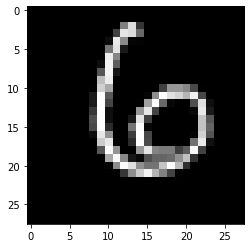

In [ ]:
# x is a data point with C*H*W shape
n=100
x= X_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)

# convert to torch.float32
x=x.type(torch.float)

# move to cuda device
x=x.to(device)

# get model output
output=_model(x)

# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print("The prediction Letter is:", pred.item())
print("The Actual Letter is:", y.item())